# Visualise a search in Papers Past

In [2]:
import requests
import pandas as pd
import altair as alt
from IPython.display import display, HTML

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [36]:
api_key = ''
print('Your API key is: {}'.format(api_key))

Your API key is: 


In [4]:
# Base url for queries
api_search_url = 'http://api.digitalnz.org/v3/records.json'

# Set up the query params (we'll change these later)
# Let's start with an empty text query to look at everything
params = {
    'api_key': api_key,
    'text': ''
}

In [20]:
params['and[display_collection][]'] = 'Papers Past'
params['text'] = 'possum OR opossum'
params['facets'] = 'year,collection'
params['facets_per_page'] = 100
response = requests.get(api_search_url, params=params)
data = response.json()

In [24]:
titles = data['search']['facets']['collection']
titles_df = pd.Series(titles).to_frame().reset_index()
titles_df.columns = ['title', 'count']
titles_df.head()

,title,count
1,Evening Post,5379
2,Otago Daily Times,3256
3,West Coast Times,1227
4,Star,1207
5,Otago Witness,859


In [17]:
years = data['search']['facets']['year']
years_df = pd.Series(years).to_frame().reset_index()
years_df.columns = ['year', 'count']
years_df['url'] = 'https://paperspast.natlib.govt.nz/newspapers?query={0}&start_date=01-01-{1}&end_date=31-12-{1}'.format(params['text'], years_df['year'][0])
years_df.head()

,year,count,url
0,1874,807,https://paperspast.natlib.govt.nz/newspapers?q...
1,1893,671,https://paperspast.natlib.govt.nz/newspapers?q...
2,1898,645,https://paperspast.natlib.govt.nz/newspapers?q...
3,1873,632,https://paperspast.natlib.govt.nz/newspapers?q...
4,1872,624,https://paperspast.natlib.govt.nz/newspapers?q...


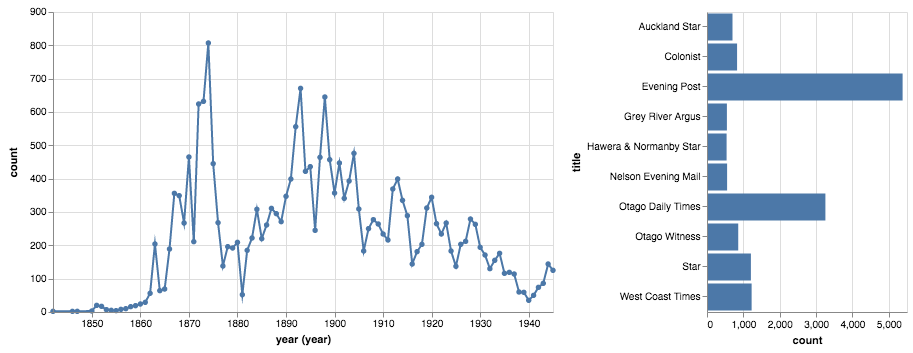

In [37]:
c1 = alt.Chart(years_df, width=600).mark_line(point=True).encode(
    x = 'year(year):T',
    y = 'count:Q',
    tooltip = [alt.Tooltip('year(year):T', title='year'), alt.Tooltip('count', format=',')],
    href='url:N'
).properties(
    height=300,
    width=500
)

c2 = alt.Chart(titles_df[1:11]).mark_bar().encode(
    x = 'count:Q',
    y = 'title:O',
    tooltip = alt.Tooltip('count', format=',')
).properties(
    height=300,
    width=200
)

c1 | c2